<h1>LUNG CANCER PREDICTION PROJECT</h1>

<h2>IMPORTS</h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifierCV ,LogisticRegression,Perceptron,SGDClassifier
from sklearn.metrics import f1_score,classification_report,roc_curve, auc
from imblearn.over_sampling import  RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB , CategoricalNB , MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

<h2>Data Loading </h2>

In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')

<h2>Exploratory Data Analysis</h2>

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [ ]:
df.replace({'LUNG_CANCER':{'YES':1,'NO':0}},inplace=True)

<ipython-input-85-4a88ed32a3b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'LUNG_CANCER':{'YES':1,'NO':0}},inplace=True)


In [ ]:
print(df['LUNG_CANCER'][:3])

0    1
1    1
2    0
Name: LUNG_CANCER, dtype: int64


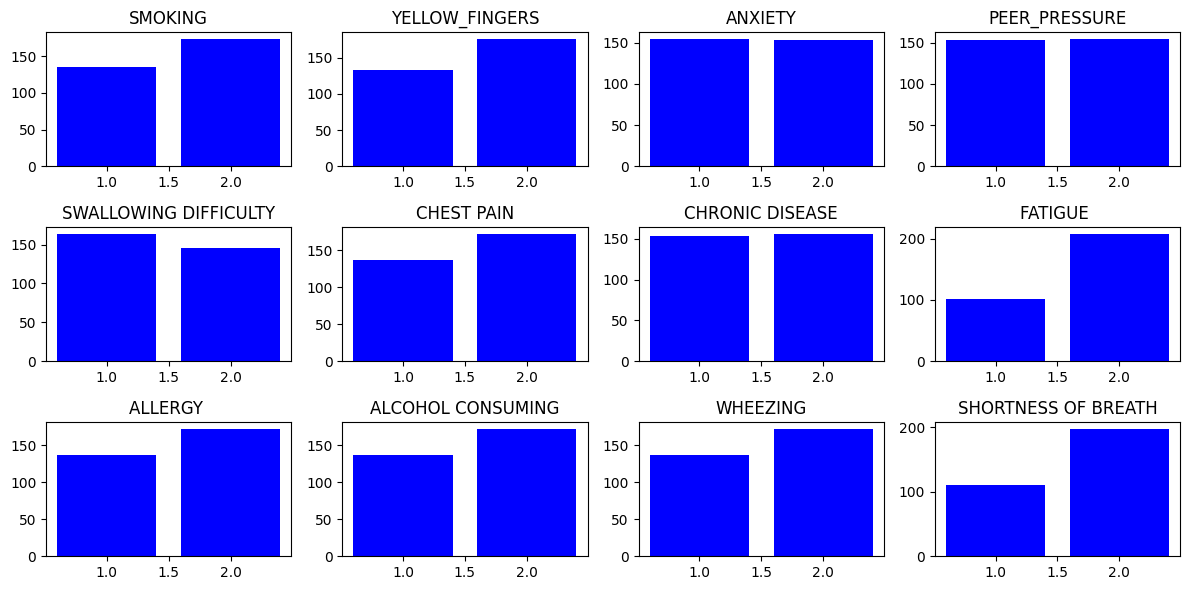

In [ ]:
columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'SWALLOWING DIFFICULTY',
           'CHEST PAIN', 'CHRONIC DISEASE','FATIGUE ', 'ALLERGY ','ALCOHOL CONSUMING','WHEEZING','SHORTNESS OF BREATH']
fig, axes = plt.subplots(3, 4, figsize=(12, 6))
axes = axes.flatten()
for i, col in enumerate(columns):
    if(i%4==0):
      print('\n')
    x = [1, 2]
    y = [df[col].value_counts().get(1,0), df[col].value_counts().get(2,0)]
    axes[i].bar(x, y, color='b')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

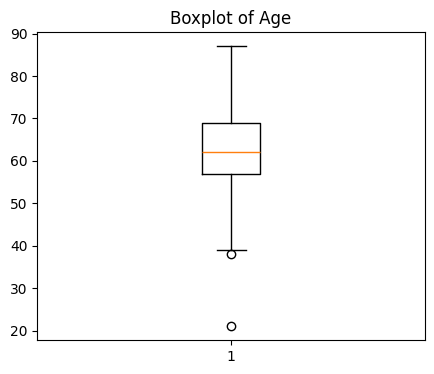

In [ ]:
plt.figure(figsize=(5,4))
plt.boxplot(df['AGE'])
plt.title('Boxplot of Age')
plt.show()
print('\n')

<ipython-input-89-bb69fe7bc776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], hist=True, kde=True)


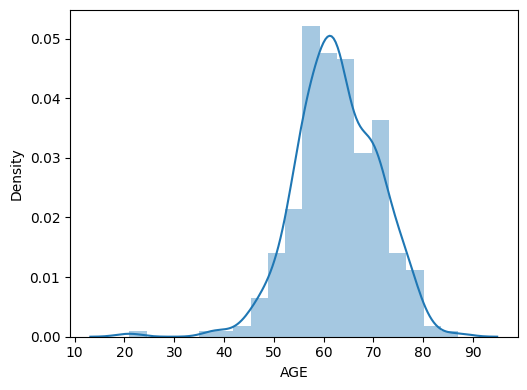

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.distplot(df['AGE'], hist=True, kde=True)
plt.tight_layout()
plt.show()

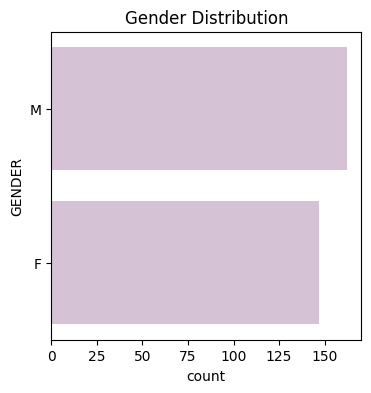

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(y='GENDER', data=df,color='#D8BFD8')
plt.title('Gender Distribution')
plt.show()

<h2>EDA Analysis</h2>

<ul>
  <li><strong>Swallowing Difficulty</strong>: The distribution between the two categories is nearly equal.</li>
  <li><strong>Chronic Disease</strong>: The distribution between the two categories is nearly equal.</li>
  <li><strong>Chest Pain</strong>: The majority falls into the second category.</li>
  <li><strong>Fatigue</strong>: The second category shows a significantly larger count.</li>
  <li><strong>Allergy</strong>: Slightly more individuals are present in the second group.</li>
  <li><strong>Alcohol Consumption</strong>: Slightly more individuals are present in the second group.</li>
  <li><strong>Wheezing</strong>: The distribution is balanced between the two categories.</li>
  <li><strong>Shortness of Breath</strong>: The second category has a higher count.</li>
</ul>
<br>
<p><b>The boxplot for AGE has the interquartile range (IQR) spanning from approximately 50 to 70. The minimum value, excluding outliers, is about 35, while the maximum is around 85. Outliers are observed below 30.</b><p>
<p><b>Also for AGE column The distribution is approximately normal, centered around 60, with the majority of data points ranging from 40 to 80 years old. The density peaks slightly above 0.05 at around 60 years. There are fewer data points below 40 and above 80.</b></p>
<br>
<p><strong>The number of males is more in the dataset rather than the females</strong></p>

<h2>Feature Engineering and processing </h2>

In [ ]:
lb=LabelEncoder()
sc=StandardScaler()
mn=MinMaxScaler()
col1=list(df.columns)
col1.remove('GENDER')
col1.remove('AGE')
col1.remove('LUNG_CANCER')
col2=['GENDER']
col3=['AGE']
dff=df.copy(deep=True)
#other models features
df[col1] = pd.DataFrame(mn.fit_transform(df[col1]),columns=col1, index=df.index)
df[col2] = pd.DataFrame(lb.fit_transform(df[col2]),columns=col2, index=df.index)
df[col3] = pd.DataFrame(sc.fit_transform(df[col3]),columns=col3, index=df.index)
#linear models
lb=LabelEncoder()
sc=StandardScaler()
dfx=dff.copy(deep=True)
col1=list(dff.columns)
col1.remove('LUNG_CANCER')
col2=['GENDER']
dff[col2] = pd.DataFrame(lb.fit_transform(dff[col2]),columns=col2, index=dff.index)
dff[col1] = pd.DataFrame(sc.fit_transform(dff[col1]),columns=col1, index=dff.index)
print(df.head())
print(dff.head())

   GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1  0.771850      0.0             1.0      1.0            0.0   
1       1  1.381829      1.0             0.0      0.0            0.0   
2       0 -0.448107      0.0             0.0      0.0            1.0   
3       1  0.039876      1.0             1.0      1.0            0.0   
4       0  0.039876      0.0             1.0      0.0            0.0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0              0.0       1.0       0.0       1.0                1.0       1.0   
1              1.0       1.0       1.0       0.0                0.0       0.0   
2              0.0       1.0       0.0       1.0                0.0       1.0   
3              0.0       0.0       0.0       0.0                1.0       0.0   
4              0.0       0.0       0.0       1.0                0.0       1.0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0      

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

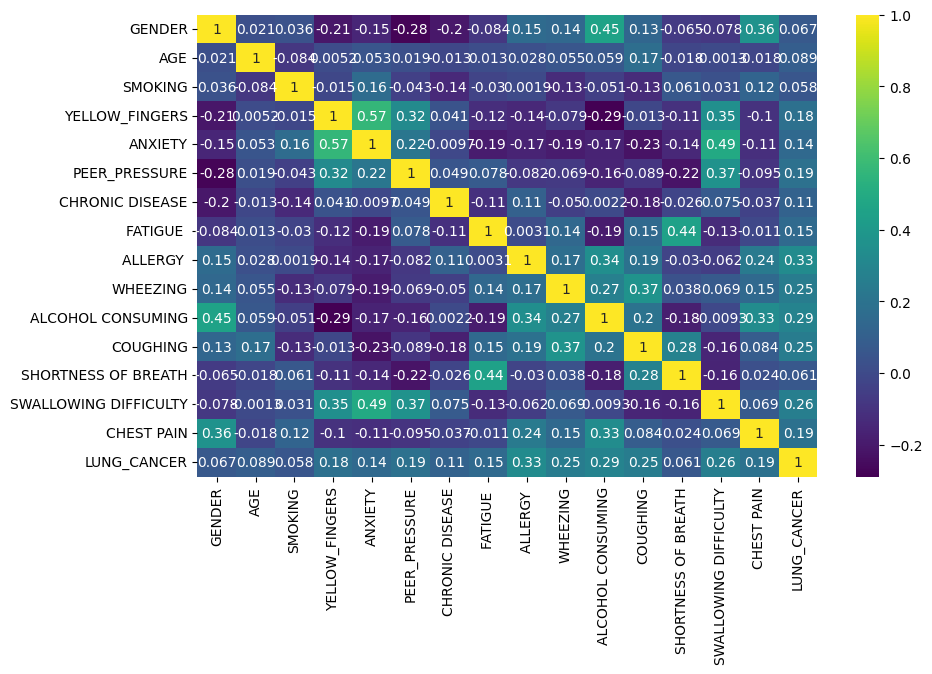

In [ ]:
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

<h3>Correlation Heatmap Summary</h3>
<h4>Strong Correlations</h4>
    <ul>
        <li><span>Anxiety</span> and <span >Yellow Fingers</span>: 0.57</li>
        <li><span>Swallowing Difficulty</span> and <span >Anxiety</span>: 0.49</li>
        <li><span >Alcohol Consuming</span> and <span >Allergy</span>: 0.34</li>
        <li><span >Coughing</span> and <span >Shortness of Breath</span>: 0.44</li>
    </ul>

<h4>Moderate Correlations with Lung Cancer</h4>
    <ul>
        <li><span >Coughing</span>: 0.33</li>
        <li><span Alcohol Consuming</span>: 0.29</li>
        <li><span >Fatigue</span>: 0.25</li>
        <li><span>Shortness of Breath</span>: 0.25</li>
        <li><span >Yellow Fingers</span>: 0.18</li>
        <li><span>Chest Pain</span>: 0.19</li>
    </ul>

<h4>Other Notable Correlations</h4>
    <ul>
        <li><span>Alcohol Consuming</span> and <span>Gender</span>: 0.45</li>
        <li><span >Chest Pain</span> and <span >Gender</span>: 0.36</li>
        <li><span >Swallowing Difficulty</span> and <span >Yellow Fingers</span>: 0.35</li>
    </ul>

<h2>Training and validation split</h2>

In [ ]:
X_linear=dff.drop('LUNG_CANCER',axis=1)
Y_linear=dff['LUNG_CANCER']
X=df.drop('LUNG_CANCER',axis=1)
Y=df['LUNG_CANCER']
X_train_linear, X_test_linear, Y_train_linear, Y_test_linear = train_test_split(X_linear,Y_linear,test_size=0.2,random_state=42,shuffle=True)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
ros=RandomOverSampler(random_state=42)
X_train,Y_train = ros.fit_resample(X_train,Y_train)
ros=RandomOverSampler(random_state=42)
X_train_linear,Y_train_linear = ros.fit_resample(X_train_linear,Y_train_linear)

<h2>Linear Models</h2>

<h3>Grid searching for best params of SGD,Logistic Regression,Perceptron</h3>

In [ ]:
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', fit_intercept=False, max_iter=10000, tol=0.001, shuffle=True, n_jobs=None, random_state=42, learning_rate='constant',
                                   early_stopping=False, warm_start=False)

Pp = Perceptron(penalty=None, max_iter=1000, tol=0.001, shuffle=True, n_jobs=None, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5,warm_start=False)

LR = LogisticRegression(penalty='l1', dual=False, tol=0.001, fit_intercept=True, random_state=42, solver='saga', max_iter=10000, warm_start=False, n_jobs=None)

paramsgd={
    "eta0": [0.0001,0.001,0.01,0.1],
    "alpha":[0.001,0.01,0.1,],
    "l1_ratio":[0,0.15,0.3,0.4,0.6,1]
}
parampp={
    "eta0": [0.001,0.01,0.1,1]
}
paramlr={
    "C":[0.001,0.01,0.1,1.0,10]
}
dictxy={}

In [ ]:
print('HYPER PARAM TUNING FOR SGD\n')
grid_search_sgd = GridSearchCV(sgd, paramsgd , cv=5, scoring ='f1_macro', return_train_score=True)
grid_search_sgd.fit(X_train_linear, Y_train_linear)  #(X,y)
print('best param : ',grid_search_sgd.best_params_)
y_predsgd = grid_search_sgd.best_estimator_.predict(X_test_linear)
fn=f1_score(Y_test_linear,y_predsgd,average='macro')
dictxy['SGD'] = fn
print('\nscore of X_test using best param : ' , fn)
y_h = grid_search_sgd.best_estimator_.predict(X_train_linear)
print('\nscore of X_train using best param : ' , f1_score(Y_train_linear,y_h,average='macro'))
print('sgd coefficient')
print( grid_search_sgd.best_estimator_.coef_)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test_linear,y_predsgd))
fpr1, tpr1, thresholds = roc_curve(Y_test_linear,y_predsgd)

HYPER PARAM TUNING FOR SGD

best param :  {'alpha': 0.01, 'eta0': 0.0001, 'l1_ratio': 0.6}

score of X_test using best param :  0.46467817896389324

score of X_train using best param :  0.8233809924306139
sgd coefficient
[[-0.00390535  0.04512384  0.05849432  0.25766016  0.22946252  0.20310776
   0.16696844  0.35634187  0.24013116  0.0878      0.28572369  0.18696796
   0.12719745  0.29324676  0.07358634]]

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.08      1.00      0.15         2
           1       1.00      0.63      0.78        60

    accuracy                           0.65        62
   macro avg       0.54      0.82      0.46        62
weighted avg       0.97      0.65      0.76        62



In [ ]:
print('HYPER PARAM TUNING FOR Logistic Regression \n')
grid_search_lr = GridSearchCV(LR, paramlr , cv=5, scoring ='f1_macro', return_train_score=True)
grid_search_lr.fit(X_train_linear, Y_train_linear)  #(X,y)
print('best param : ',grid_search_sgd.best_params_)
y_predlr = grid_search_lr.best_estimator_.predict(X_test_linear)
fn=f1_score(Y_test_linear,y_predlr,average='macro')
dictxy['Logistic']= fn
print('\nscore of X_test using best param : ' , fn)
y_h = grid_search_lr.best_estimator_.predict(X_train_linear)
print('\nscore of X_train using best param : ' , f1_score(Y_train_linear,y_h,average='macro'))
print('lr coefficient')
print( grid_search_lr.best_estimator_.coef_)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test_linear,y_predlr))
fpr2, tpr2, thresholds2 = roc_curve(Y_test_linear,y_predlr)

HYPER PARAM TUNING FOR Logistic Regression 

best param :  {'alpha': 0.01, 'eta0': 0.0001, 'l1_ratio': 0.6}

score of X_test using best param :  0.5806763285024155

score of X_train using best param :  0.9403785112798178
lr coefficient
[[-0.2911408   0.29640338  0.79157832  0.98502358  0.58835727  0.91224911
   1.29318091  1.53601377  0.65859695  0.08601594  1.17228297  1.34394073
   0.09663096  1.80154719  0.44778996]]

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.98      0.90      0.94        60

    accuracy                           0.89        62
   macro avg       0.56      0.70      0.58        62
weighted avg       0.95      0.89      0.92        62



In [ ]:
print('HYPER PARAM TUNING FOR Perceptron\n')
grid_search_pp = GridSearchCV(Pp, parampp , cv=5, scoring ='f1_macro', return_train_score=True)
grid_search_pp.fit(X_train_linear, Y_train_linear)  #(X,y)
print('best param : ',grid_search_pp.best_params_)
y_predpp = grid_search_pp.best_estimator_.predict(X_test_linear)
fn=f1_score(Y_test_linear,y_predpp,average='macro')
dictxy['perceptron']= fn
print('\nscore of X_test using best param : ' , fn)
y_h = grid_search_pp.best_estimator_.predict(X_train_linear)
print('\nscore of X_train using best param : ' , f1_score(Y_train_linear,y_h,average='macro'))
print('Perceptron coefficient')
print( grid_search_pp.best_estimator_.coef_)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test,y_predpp))
fpr3, tpr3, thresholds3 = roc_curve(Y_test_linear,y_predpp)

HYPER PARAM TUNING FOR Perceptron

best param :  {'eta0': 0.001}

score of X_test using best param :  0.6214896214896215

score of X_train using best param :  0.8904737068867774
Perceptron coefficient
[[ 0.00122474  0.00161398  0.00602879  0.00381054  0.0040518   0.00194823
   0.00384484  0.00688554  0.00622778  0.00220187  0.00622778  0.00553279
  -0.00052614  0.00699706  0.00421483]]

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62



<h3>RidgeCV implementation</h3>

In [ ]:
print('Ridge Cv Classifier')
rr=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5)
rr.fit(X_train_linear,Y_train_linear)
y_predrcv = rr.predict(X_test_linear)
fn=f1_score(Y_test_linear,y_predrcv,average='macro')
dictxy['RidgeCV']= fn
print('\nscore of X_test using best param : ' , fn)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test_linear,y_predrcv))
fpr4, tpr4, thresholds4 = roc_curve(Y_test_linear,y_predrcv)

Ridge Cv Classifier

score of X_test using best param :  0.5649122807017544

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.98      0.88      0.93        60

    accuracy                           0.87        62
   macro avg       0.55      0.69      0.56        62
weighted avg       0.95      0.87      0.91        62



<h3>Support Vector Machine</h3>

In [ ]:
svm = SVC(C=10, kernel='rbf', gamma=0.1)
svm.fit(X_train_linear,Y_train_linear)
ypred=svm.predict(X_test_linear)
fn=f1_score(Y_test_linear,ypred,average='macro')
dictxy['SVM']= fn
print('\n Validation score of SVC : ',fn)
print('\nCLASSIFICATION REPORT: ')
print(classification_report(Y_test_linear,ypred))


 Validation score of SVC :  0.6214896214896215

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62



In [ ]:
lsvc =LinearSVC(penalty='l2', loss='squared_hinge', dual='auto', tol=0.0001, C=0.01, random_state=42, max_iter=1000)
lsvc.fit(X_train_linear,Y_train_linear)
ypred=lsvc.predict(X_test_linear)
print('Linear Support Vector Machine decision function : ', lsvc.coef_)
fn=f1_score(Y_test_linear,ypred,average='macro')
dictxy['Linear SVM']= fn
print('\n Validation score : ',fn)
print('\nCLASSIFICATION REPORT: ')
print(classification_report(Y_test_linear,ypred))
fpr5, tpr5, thresholds5 = roc_curve(Y_test_linear,ypred)

Linear Support Vector Machine decision function :  [[-0.04967142  0.06531434  0.0877395   0.22024096  0.14091597  0.15241533
   0.16236573  0.28314577  0.19457364  0.07642891  0.26338757  0.18367476
   0.08957789  0.22651495  0.09905554]]

 Validation score :  0.5649122807017544

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.98      0.88      0.93        60

    accuracy                           0.87        62
   macro avg       0.55      0.69      0.56        62
weighted avg       0.95      0.87      0.91        62



<h2>KNN and Naive bayes </h2>

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', p=2, metric='minkowski', n_jobs=None)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
score=f1_score(Y_test,y_pred,average='macro')
dictxy['KNN']= score
print('KNN score for 5 neighbours : ',score)
fpr6, tpr6, thresholds6 = roc_curve(Y_test,y_pred)
print('\nCLASSIFICATION REPORT: ')
print(classification_report(Y_test,y_pred))

KNN score for 5 neighbours :  0.5649122807017544

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.98      0.88      0.93        60

    accuracy                           0.87        62
   macro avg       0.55      0.69      0.56        62
weighted avg       0.95      0.87      0.91        62



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
ypred=gnb.predict(X_test)
x=gnb.theta_
print('Variance of each feature per class : ',gnb.var_)
print('\nmean of each feature per class such that its assumed each feature is of gausian pdf : ',gnb.theta_)
print('\n Probability of each class : ',gnb.class_prior_)
score=f1_score(Y_test,ypred,average='macro')
dictxy['Naive Bayes']= score
print('Validation score : ',score)
fpr7, tpr7, thresholds7 = roc_curve(Y_test,ypred)
print('\nCLASSIFICATION REPORT: ')
print(classification_report(Y_test,ypred))

Variance of each feature per class :  [[0.2467347  1.95897124 0.24943311 0.21371882 0.20807256 0.19331066
  0.23346939 0.24888889 0.15122449 0.18630386 0.16562358 0.18387755
  0.24816327 0.09752835 0.21725624]
 [0.24725624 0.88052367 0.24344671 0.24344671 0.2499093  0.24888889
  0.24997733 0.18868481 0.23902494 0.24092971 0.23800454 0.23092971
  0.21895692 0.24979592 0.24265306]]

mean of each feature per class such that its assumed each feature is of gausian pdf :  [[ 0.44285714 -0.3121693   0.52380952  0.30952381  0.2952381   0.26190476
   0.37142857  0.46666667  0.18571429  0.24761905  0.20952381  0.24285714
   0.54285714  0.10952381  0.31904762]
 [ 0.55238095 -0.01705572  0.58095238  0.58095238  0.50952381  0.53333333
   0.5047619   0.74761905  0.6047619   0.5952381   0.60952381  0.63809524
   0.67619048  0.48571429  0.58571429]]

 Probability of each class :  [0.5 0.5]
Validation score :  0.6214896214896215

CLASSIFICATION REPORT: 
              precision    recall  f1-score   sup

<h2>Tree based Models and Bagging </h2>

In [ ]:
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, Y_train)
print('Random Forest ')
y_predrf = pipeline.predict(X_test)
score=f1_score(Y_test,y_predrf,average='macro')
dictxy['Random Forest']= score
print('\nscore of X_test using best param : ' , score)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test,y_predrf))
feature_selector = pipeline.named_steps['feature_selection']
selected_features = feature_selector.get_support()
selected_columns = X_train.columns[selected_features]
print("Selected features:", list(selected_columns))
fpr8, tpr8, thresholds8 = roc_curve(Y_test,y_predrf)

Random Forest 

score of X_test using best param :  0.6497175141242938

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62

Selected features: ['AGE', 'FATIGUE ', 'ALLERGY ', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY']


In [ ]:
d = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=200)
d.fit(X_train,Y_train)
ypred=d.predict(X_test)
print('dt Validation score : ',f1_score(Y_test,ypred,average='macro'))

dt Validation score :  0.5991379310344828


In [ ]:
DT = DecisionTreeClassifier(criterion='gini', splitter='best',random_state=42,max_depth=5, min_samples_split=2,
                            min_samples_leaf=2, max_features='sqrt', max_leaf_nodes=5 )

bag = BaggingClassifier(estimator=DT, n_estimators=150, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=True, warm_start=False, random_state=42)
bag.fit(X_train,Y_train)
print('Bagging oob score : ',bag.oob_score_)
ypred=bag.predict(X_test)
score=f1_score(Y_test,y_predrf,average='macro')
dictxy['Bagging']= score
print('Bagging validation score : ', score)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test,ypred))
fpr9, tpr9, thresholds9 = roc_curve(Y_test,ypred)
DT = DecisionTreeClassifier(criterion='gini', splitter='best',random_state=42,max_depth=5, min_samples_split=2,
                            min_samples_leaf=2, max_features='sqrt', max_leaf_nodes=5 )

ada = AdaBoostClassifier(estimator=DT, n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42)
ada.fit(X_train,Y_train)
print('Adaboost Feature importances : ',ada.feature_importances_)
ypred=ada.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['Adaboost']= score
print('Adaboost validation score : ',score)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test,ypred))
fpr10, tpr10, thresholds10 = roc_curve(Y_test,ypred)

Bagging oob score :  0.8833333333333333
Bagging validation score :  0.6497175141242938

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62

Adaboost Feature importances :  [0.02684099 0.28055352 0.03484173 0.03905264 0.04936791 0.06729365
 0.04935797 0.09733489 0.04555593 0.02827743 0.06998235 0.08167947
 0.06349209 0.03539809 0.03097134]
Adaboost validation score :  0.6873949579831933

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted av

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)
xgb.fit(X_train,Y_train)
ypred=xgb.predict(X_test)
score=f1_score(Y_test,ypred,average='macro')
dictxy['Xgboost']= score
print(score)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test,ypred))
fpr11, tpr11, thresholds11 = roc_curve(Y_test,ypred)

0.7416666666666667

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



<h2>Multilayer Perceptron</h2>

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8192,4), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                                     learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                                     warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                                     beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp.fit(X_train_linear,Y_train_linear)
ypred=mlp.predict(X_test_linear)
score=f1_score(Y_test_linear,ypred,average='macro')
dictxy['MLP']= score
print('f1 score for MLP : ',score)
print('\n CLASSIFICATION REPORT : ')
print(classification_report(Y_test_linear,ypred))

f1 score for MLP :  0.7327586206896552

 CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.93      0.97        60

    accuracy                           0.94        62
   macro avg       0.67      0.97      0.73        62
weighted avg       0.98      0.94      0.95        62



<h2>Comparison Of Various Models</h2>

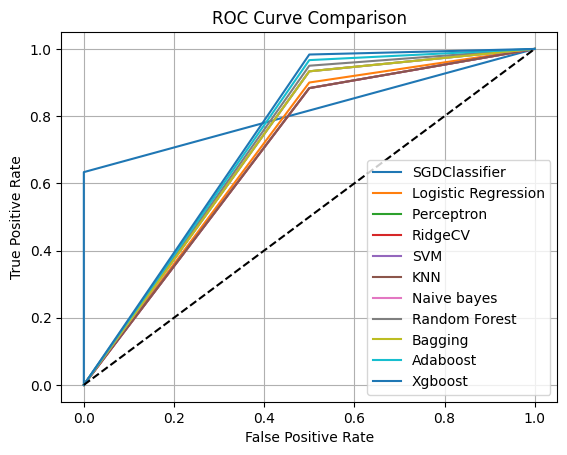

In [ ]:
plt.plot(fpr1, tpr1, label='SGDClassifier')
plt.plot(fpr2, tpr2, label='Logistic Regression')
plt.plot(fpr3, tpr3, label='Perceptron ')
plt.plot(fpr4, tpr4, label='RidgeCV')
plt.plot(fpr5, tpr5, label='SVM')
plt.plot(fpr6, tpr6, label='KNN')
plt.plot(fpr7, tpr7, label='Naive bayes')
plt.plot(fpr8, tpr8, label='Random Forest ')
plt.plot(fpr9, tpr9, label='Bagging')
plt.plot(fpr10, tpr10, label='Adaboost')
plt.plot(fpr11, tpr11, label='Xgboost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

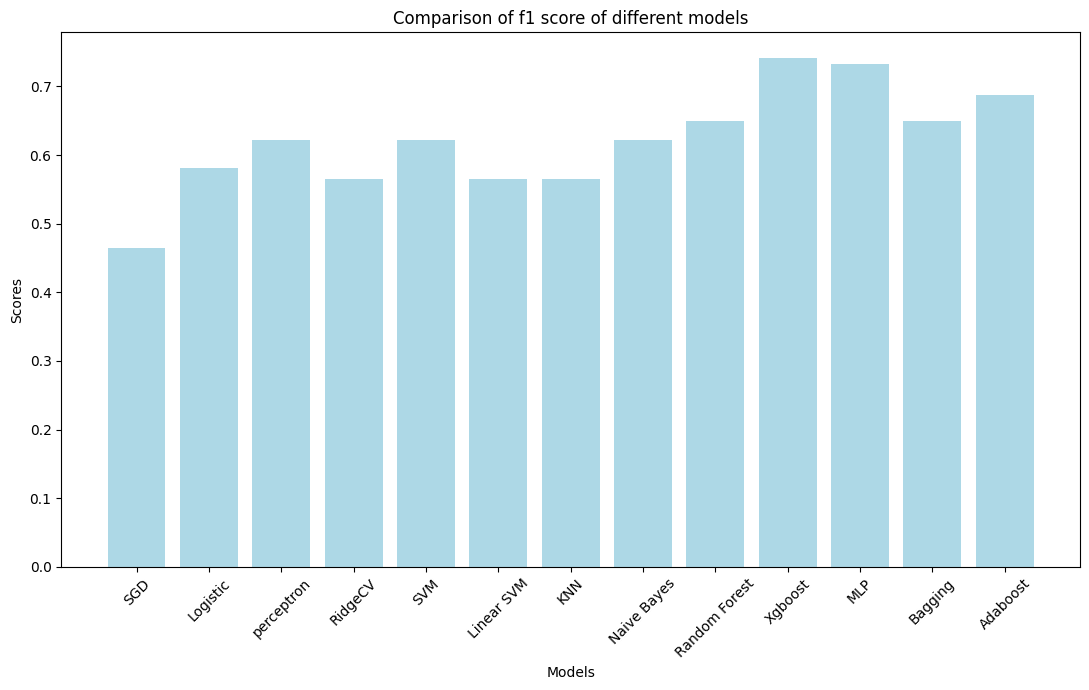

In [ ]:
plt.figure(figsize=(11, 7))
plt.bar(dictxy.keys(), dictxy.values(), color='lightblue')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of f1 score of different models')
plt.tight_layout()
plt.show()

<h2>CLASSIFICATION REPORT</h2>

<b>SGDClassifier: Appears to have a prominent curve, indicating high TPR even at lower FPR.<br>
Logistic Regression and Perceptron: These have smooth curves closely following the upper-left corner, demonstrating good performance.<br>
SVM, KNN, and RidgeCV: Their curves are relatively close to each other, indicating similar classification abilities.<br>
Naive Bayes: Its curve is slightly less pronounced compared to others, indicating lower predictive performance.<br>
Random Forest, Bagging, Adaboost, and XGBoost: These ensemble models exhibit tightly grouped, strong curves with consistently high TPR and low FPR, reflecting excellent overall performance.<br>
<h3>Performance Insights:</h3>

Most models cluster near the upper-left corner, which suggests that they achieve high sensitivity with low false-positive rates.
Ensemble models like Random Forest, Adaboost, and XGBoost likely have the highest AUC, as their curves dominate the top region.</b>
<br>
<p><b>The F1 scores of various models. Xgboost, MLP, and Bagging have the highest scores, all above 0.7. Other models like Logistic, Perceptron, and RidgeCV also perform well, with scores around 0.65. SGD has the lowest F1 score, below 0.5. This indicates that ensemble methods like Xgboost and Bagging perform better in this context.</b></p>

<h3></h3>